In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.random import default_rng
from itertools import product


In [3]:
class Perceptron:
    def __init__(self, n):
        self.rng = default_rng()
        self.n = n
        self.lr = 0.05
        self.iters = 20
        self.thresh = 0
        self.weights = self.rng.normal(loc=0, scale =1/self.n, size=(self.n,))
        self.xy = []
    
    def g(self, x) -> int:
        O = np.dot(self.weights, x) - self.thresh
        g = 0
        if O >= 0:
            g = 1
        else:
            g = -1
        return g
    
    
    def run(self) -> float:
        
        def hasher(l: list)  -> str:
            h = ''
            for x in l:
                h += str(x)
            return h
        
        def unhasher(s: str)  -> list:
            l = []
            for c in s:
                l.append(int(c))
            return l
        
        num_linearly_sep_funcs = 0
        
        values = [0, 1]
        # Find 10^4 unique functions
        hashes = []
        functions = []
        max_iters = 10 ** 4
        num_functions = 2 ** (2 ** self.n) 
        
        pairs = list(product(values, repeat=self.n))
        x_list = []
        for p in pairs:
            x_list.append(list(p))
        self.xy = np.asarray(x_list)
        if max_iters < num_functions:
            while len(functions) < max_iters:
                rng = default_rng()
                f = rng.choice(values, 2 ** self.n)
                h = hasher(f)
                f[f==0] = -1
                if h not in hashes:
                    hashes.append(h)
                    functions.append(f)
        
        else:
            while len(functions) < num_functions:
                rng = default_rng()
                f = rng.choice(values, 2 ** self.n)
                h = hasher(f)
                f[f==0] = -1
                if h not in hashes:
                    hashes.append(h)
                    functions.append(f)
        print(f'Done with sampling {len(functions)} functions')
        for i in range(len(functions)):
            f = functions[i]
            h = hashes[i]
            for _ in range(self.iters):
                for j, x in enumerate(self.xy):
                    O = self.g(x)
                    t = f[j]
                    dw = self.lr * (t - O) * x
                    dth = -self.lr * (t - O) 
                    self.weights += dw
                    self.thresh += dth
                    
            # Check if it is linearly separable    
            correct = 0
            for j, x in enumerate(self.xy):
                if self.g(x) == f[j]:
                    correct += 1
                    
            if correct == len(f):
                num_linearly_sep_funcs += 1
        
        print(f'For n={self.n} there are {num_linearly_sep_funcs} linearly seperable boolean functions!\n')
        return num_linearly_sep_funcs

answers = []
for _ in range(10):
    p = Perceptron(4)
    # print(p.weights)
    answers.append(p.run())

Done with sampling 10000 functions
For n=4 there are 275 linearly seperable boolean functions!

Done with sampling 10000 functions
For n=4 there are 272 linearly seperable boolean functions!

Done with sampling 10000 functions
For n=4 there are 245 linearly seperable boolean functions!

Done with sampling 10000 functions
For n=4 there are 273 linearly seperable boolean functions!

Done with sampling 10000 functions
For n=4 there are 249 linearly seperable boolean functions!

Done with sampling 10000 functions
For n=4 there are 299 linearly seperable boolean functions!

Done with sampling 10000 functions
For n=4 there are 267 linearly seperable boolean functions!

Done with sampling 10000 functions
For n=4 there are 240 linearly seperable boolean functions!

Done with sampling 10000 functions
For n=4 there are 262 linearly seperable boolean functions!

Done with sampling 10000 functions
For n=4 there are 262 linearly seperable boolean functions!



In [4]:
print(f'n=4: {np.mean(answers)} +- {np.std(answers)}')

n=4: 264.4 +- 16.33523798418621


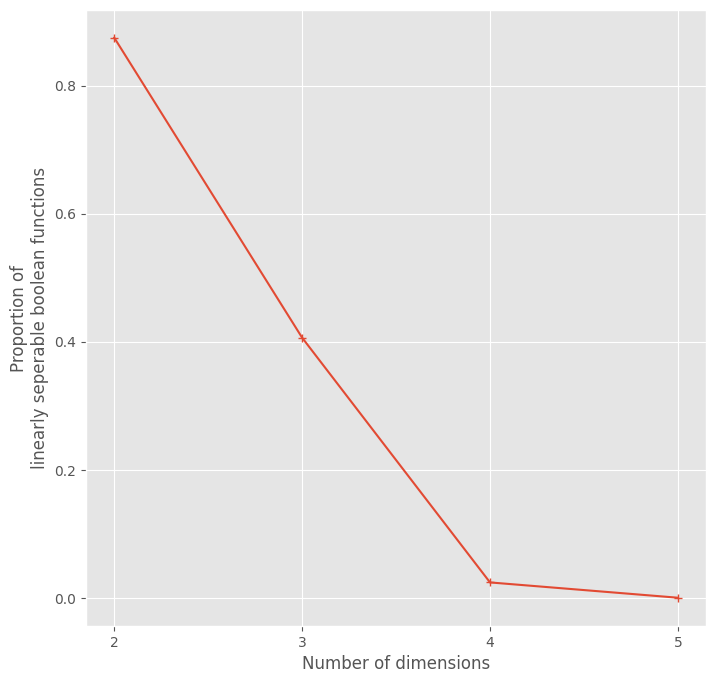

In [262]:
answers_scaled = [14/16, 104/256, 239/10000, 0]
plt.style.use('ggplot')
f = plt.figure(figsize=(8,8))
plt.plot([2, 3, 4, 5], answers_scaled, marker='+')
plt.ylabel('Proportion of\nlinearly seperable boolean functions')
plt.xlabel('Number of dimensions')
plt.xticks([2,3,4,5], [2,3,4,5])
plt.show()

In [5]:
import numpy as np
ps = [0.1, 0.2, 0.5, 0.6]
r = np.random.rand(4)
h = np.zeros((4,))
h[:] = -1
h[r < ps ] = 1
print(h)
print(r)
print(ps)

h2 =np.zeros((4,))
h2[r > ps] = -1



def pp(a):
    return 1/(np.exp(-2*a))

print(pp(np.asarray(ps)))

[-1. -1. -1.  1.]
[0.40978826 0.72903118 0.82322681 0.05226663]
[0.1, 0.2, 0.5, 0.6]
[1.22140276 1.4918247  2.71828183 3.32011692]
